In [5]:
######################
#import useful modules
######################
import sys
sys.path.append("/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/") 

from Modules import *
#from Modules_gula import *
%matplotlib inline

########
# Using multiple files
import xarray as xa

#######

file_ac = xa.open_mfdataset('Anticyclonic_gigatl3_1h_3500_*.nc',combine='nested',concat_dim='obs')
file_c = xa.open_mfdataset('Cyclonic_gigatl3_1h_3500_*.nc',combine='nested',concat_dim='obs')



/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


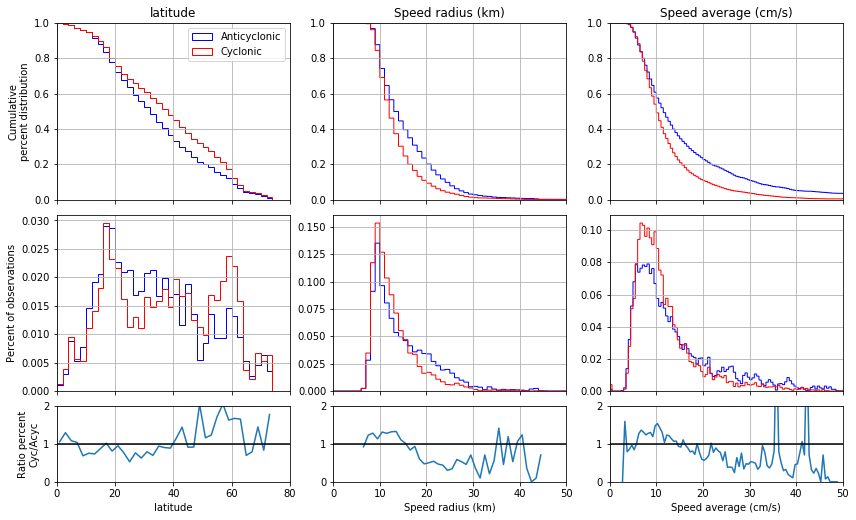

In [6]:
fig = plt.figure(figsize=(12, 7))

kwargs_a = dict(label="Anticyclonic", color="b", histtype="step", density=True)
kwargs_c = dict(label="Cyclonic", color="r", histtype="step", density=True)

for x0, name, title, xmax, factor, bins in zip(
    (0.4, 0.72, 0.08),
    ('speed_radius', "speed_average", "latitude"),
    ("Speed radius (km)", "Speed average (cm/s)", "latitude"),
    (50, 50, 80),
    (0.001, 100, 1),
    (np.arange(0, 2000, 1), np.arange(0, 1000, 0.5), np.arange(0.0005, 1000, 2)),
):
    ax_hist = fig.add_axes((x0, 0.24, 0.27, 0.35))
    nb_a, _, _ = ax_hist.hist(file_ac[name] * factor, bins=bins, **kwargs_a)
    nb_c, _, _ = ax_hist.hist(file_c[name] * factor, bins=bins, **kwargs_c)
    ax_hist.set_xticklabels([])
    ax_hist.set_xlim(0, xmax)
    ax_hist.grid()

    ax_cum = fig.add_axes((x0, 0.62, 0.27, 0.35))
    ax_cum.hist(file_ac[name] * factor, bins=bins, cumulative=-1, **kwargs_a)
    ax_cum.hist(file_c[name] * factor, bins=bins, cumulative=-1, **kwargs_c)
    ax_cum.set_xticklabels([])
    ax_cum.set_title(title)
    ax_cum.set_xlim(0, xmax)
    ax_cum.set_ylim(0, 1)
    ax_cum.grid()

    ax_ratio = fig.add_axes((x0, 0.06, 0.27, 0.15))
    ax_ratio.set_xlim(0, xmax)
    ax_ratio.set_ylim(0, 2)
    ax_ratio.plot((bins[1:] + bins[:-1]) / 2, nb_c / nb_a)
    ax_ratio.axhline(1, color="k")
    ax_ratio.grid()
    ax_ratio.set_xlabel(title)

ax_cum.set_ylabel("Cumulative\npercent distribution")
ax_hist.set_ylabel("Percent of observations")
ax_ratio.set_ylabel("Ratio percent\nCyc/Acyc")
ax_cum.legend()